# Atlas Translation: Yeo-2011 to Desikan-Killiani (DK)

In [1]:
import itertools
import nibabel as nb
import numpy as np
import pandas as pd
from atlasreader import atlasreader as ar
from nilearn._utils import check_niimg

## 1. Calculate Voxel Data

### 1.1 Storing Yeo Atlas information

In [2]:
#Read Yeo labels from file, fixing spacings and new / empty lines
Yeo_labels = open('../data/atlases/Yeo2011_7Networks_MNI152.txt', 'r')
Yeo_labels = Yeo_labels.read().split('\n')
Yeo_labels = [Yeo_labels[i][8:] for i in range(len(Yeo_labels)-1)]
Yeo_labels.insert(0,"None") #I believe the areas were numbered 1-7 with "0" reserved for white matter

#Read Yeo matrix
Yeo_template = "../data/atlases/Yeo2011_7Networks_MNI152.nii"
Yeo = nb.load(Yeo_template)
Yeo_data = Yeo.get_data()

### 1.2 Loop thru MNI-152 template data

In [3]:
DK_data = ar.get_atlas("desikan_killiany")['image'].get_data()

DK_atlas = ar.get_atlas("desikan_killiany")

We would like to loop over the pixels and compare them between atlases but, unfortunately, the matrices are cropped to remove large regions full of zeros so the matrices are not 256x256x256 anymore.

We can try doing the same operation in real, xyz space instead of in MNI-type indices. We do so by using `coord_ijk_to_xyz` function in `atlasreader`.

In [4]:
Yeo_affine = check_niimg(Yeo_template).affine
DK_affine  = check_niimg(ar.get_atlas("desikan_killiany")['image']).affine

### 1.3. Compute the DK voxel-based distribution of networks per region (very slow!!)

In [5]:
# DK_dict_voxels = {}
# DK_dict_counts = {}

# for n in ar.get_atlas("desikan_killiany")['labels']['name']:
#     DK_dict_counts.update({n: {Yeo_label:0 for Yeo_label in Yeo_labels}})
#     DK_dict_voxels.update({n: {Yeo_label:[] for Yeo_label in Yeo_labels}})
    
# for DK_i in range(0, DK_data.shape[0]):
#     for DK_j in range(0, DK_data.shape[1]):
#         for DK_k in range(0, DK_data.shape[2]):           
#             DK_voxel_label  = DK_data[DK_i, DK_j, DK_k]
#             DK_voxel_region = ar.get_label(DK_atlas, DK_voxel_label)

#             if DK_voxel_region != 'Unknown':

#                 xyz = ar.coord_ijk_to_xyz(DK_affine, [DK_i, DK_j, DK_k])
#                 Yeo_ijk = ar.coord_xyz_to_ijk(Yeo_affine, xyz)[0]
                             
#                 Yeo_voxel_label = int(Yeo_data[Yeo_ijk[0], Yeo_ijk[1], Yeo_ijk[2]])
#                 Yeo_voxel_region = Yeo_labels[Yeo_voxel_label]

#                 DK_dict_counts[DK_voxel_region][Yeo_voxel_region] += 1
#                 DK_dict_voxels[DK_voxel_region][Yeo_voxel_region].append(xyz[0])


In [6]:
# np.save('DK_dict_voxels.npy', DK_dict_voxels)
# np.save('DK_dict_counts.npy', DK_dict_counts)

### 1.3b Or just load it

`DK_dict_counts` is a matrix with the number of voxels belonging to a given Yeo network, for each DK region.

`DK_dict_voxels` is a similar matrix but it contains the actual [x,y,z] locations of each voxel so we can use them to make the brain plots

In [7]:
DK_dict_counts = np.load("DK_dict_counts.npy")
DK_dict_counts = DK_dict_counts.item()

In [8]:
pd.DataFrame(DK_dict_counts)

,Unknown,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
Default,0,27493,0,0,0,2,0,0,0,0,...,1490,2104,12504,0,2591,25,282,0,0,87
Dorsal_Attention,0,14727,0,0,0,0,0,0,0,0,...,0,0,1117,9832,0,1480,0,0,0,0
Frontoparietal,0,14179,0,0,0,0,0,0,0,0,...,48,13480,4232,147,0,1016,0,0,0,416
Limbic,0,7228,0,0,0,0,0,0,2,0,...,14,1023,24,0,1554,0,1100,2843,0,102
None,0,183337,7270,49,18921,64291,10871,5049,8112,2508,...,99,21,220,156,12,46,2,59,3,610
Somatomotor,0,19635,0,0,0,0,0,0,4,0,...,0,0,1260,1451,7233,1402,0,0,1067,1416
Ventral_Attention,0,9305,0,0,0,0,0,0,30,0,...,0,1352,4321,0,1029,4350,0,0,0,4328
Visual,0,24830,0,0,0,16,0,0,0,0,...,0,0,0,3364,0,0,0,0,0,0


## 2. Prepare the data

### 2.1 Make Pandas DataFrame with the 86 ROIs

The DK dataframe from `nilearn` has extra regions like "Left-Cerebellum-White-Matter" that need to be removed. 

I do so below by making a new dataframe containing only columns that agree with what we know to be DK.

In [9]:
DK_region_names = pd.read_csv("../data/dk_names.csv").set_index('Atlas')

In [10]:
DK_dict_86_regions = {}
for region in DK_region_names.index:
    DK_dict_86_regions.update({region:DK_dict_counts[region]})

In [11]:
# transform into a pandas df
DK_dict_counts = pd.DataFrame(DK_dict_86_regions)
# drop "None" (white matter)
DK_dict_counts = DK_dict_counts.drop(['None'])

In [12]:
DK_dict_counts

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,Left-VentralDC,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
Default,1400,101,3545,8,7,26,6723,2257,2054,12,...,0,0,0,0,0,0,24,0,0,0
Dorsal_Attention,0,0,1013,0,0,1623,2093,4623,0,564,...,0,0,0,0,0,0,0,0,0,0
Frontoparietal,0,454,2293,0,0,0,2335,2763,173,0,...,0,0,0,0,0,0,0,0,0,0
Limbic,0,0,0,0,2336,4368,0,4766,0,0,...,0,0,0,0,9,0,35,101,15,0
Somatomotor,577,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
Ventral_Attention,319,842,0,0,0,0,2,0,0,0,...,0,0,0,0,51,0,0,0,0,0
Visual,0,0,0,3972,0,5599,1490,306,275,13289,...,0,10,0,0,0,0,71,0,0,0


### 2.2 Normalize each region so that its networks add up to 1

In [13]:
DK_df_normalized = DK_dict_counts.div(DK_dict_counts.sum(axis=0), axis=1)

In [14]:
DK_df_normalized

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,Left-VentralDC,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC
Default,0.609756,0.072298,0.517443,0.00201,0.002988,0.002238,0.531757,0.153381,0.820943,0.000865,...,NaN,0.0,NaN,NaN,0.000000,NaN,0.184615,0.0,0.0,NaN
Dorsal_Attention,0.000000,0.000000,0.147862,0.00000,0.000000,0.139721,0.165546,0.314169,0.000000,0.040678,...,NaN,0.0,NaN,NaN,0.000000,NaN,0.000000,0.0,0.0,NaN
Frontoparietal,0.000000,0.324982,0.334696,0.00000,0.000000,0.000000,0.184687,0.187768,0.069145,0.000000,...,NaN,0.0,NaN,NaN,0.000000,NaN,0.000000,0.0,0.0,NaN
Limbic,0.000000,0.000000,0.000000,0.00000,0.997012,0.376033,0.000000,0.323887,0.000000,0.000000,...,NaN,0.0,NaN,NaN,0.140625,NaN,0.269231,1.0,1.0,NaN
Somatomotor,0.251307,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.0,NaN,NaN,0.062500,NaN,0.000000,0.0,0.0,NaN
Ventral_Attention,0.138937,0.602720,0.000000,0.00000,0.000000,0.000000,0.000158,0.000000,0.000000,0.000000,...,NaN,0.0,NaN,NaN,0.796875,NaN,0.000000,0.0,0.0,NaN
Visual,0.000000,0.000000,0.000000,0.99799,0.000000,0.482008,0.117852,0.020795,0.109912,0.958457,...,NaN,1.0,NaN,NaN,0.000000,NaN,0.546154,0.0,0.0,NaN


### 2.3 Save to file

In [15]:
DK_df_normalized.to_csv("DK_dictionary_normalized.csv")

## 3. Plotting networks

### 3.1 Plot ROI (center of mass only)

In [16]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from nilearn import plotting

In [17]:
# Calculate center of mass from file
com_dk = np.load("../data/com_dk.npy")
com_dk = com_dk.ravel()[0] #not sure why / whether i need this
coords = np.array([com_dk[region] for region in DK_df_normalized.columns])

In [18]:
def plot_glass_brains(color, coords, size):
    """Plot a glass brain for a 90 regions ATLAS with nodes colored by `color`.

    Args:
        color (list): Color indices. e.g. [0,1,1,0] will color nodes [1,2] differently.

    Returns:
        matplotlib.plot: A plot object.

    """

    connec = np.array([[0]*86]*86)

    plotting.plot_connectome(connec, coords, node_size = size, node_color=color, display_mode='lyrz')

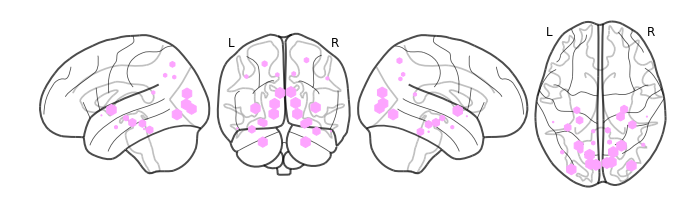

In [19]:
plot_glass_brains([[0.9921875,0.64453125,1]]*86, coords, DK_df_normalized.loc['Visual'].values*120)

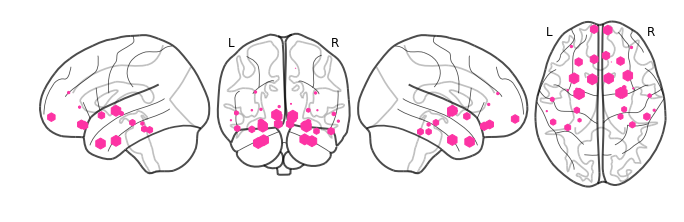

In [20]:
plot_glass_brains([[0.9921875,0.2,0.64453125]]*86, coords, DK_df_normalized.loc['Limbic'].values*120)

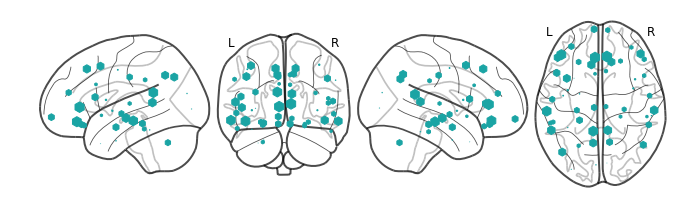

In [21]:
plot_glass_brains([[0.1,0.64453125,0.64453125]]*86, coords, DK_df_normalized.loc['Default'].values*120)

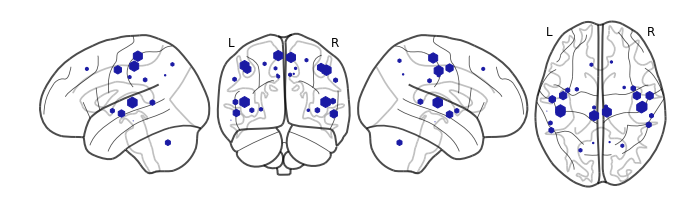

In [22]:
plot_glass_brains([[0.1,0.1,0.64453125]]*86, coords, DK_df_normalized.loc['Somatomotor'].values*120)

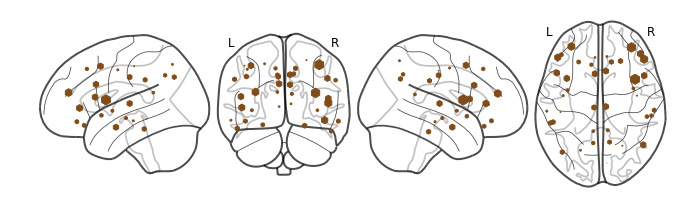

In [23]:
plot_glass_brains([[0.5,0.3,0.1]]*86, coords, DK_df_normalized.loc['Frontoparietal'].values*120)

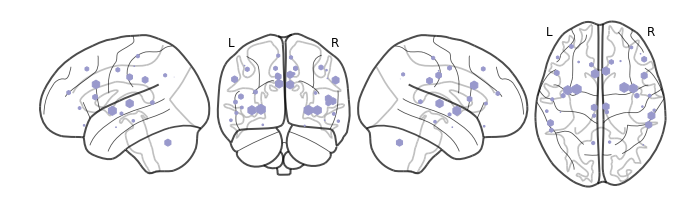

In [24]:
plot_glass_brains([[0.6,0.6,0.8]]*86, coords, DK_df_normalized.loc['Ventral_Attention'].values*120)

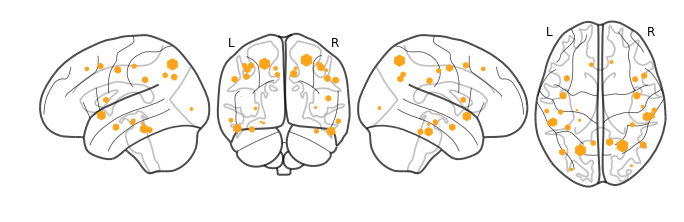

In [25]:
plot_glass_brains([[0.9921875,0.64453125,0.1]]*86, coords, DK_df_normalized.loc['Dorsal_Attention'].values*220)

### 3.2 Plotting all voxels

In [31]:
DK_dict_voxels = np.load("DK_dict_voxels.npy")

In [32]:
DK_dict_voxels = DK_dict_voxels.item()

In [34]:
DK_voxels_df = pd.DataFrame(DK_dict_voxels)

In [35]:
network_coordinates_DK = {network:[] for network in DK_voxels_df.index}

In [65]:
colors = np.array(
         [[255,227,133,0.1*255],
          [197,232,146,0.1*255],
          [255,196,158,0.1*255],
          [200,180,232,0.1*255],
          [141,216,255,0.1*255],
          [255,158,179,0.1*255],
          [143,255,200,0.1*255]])/255

In [36]:
for network in network_coordinates_DK:
    coords = DK_voxels_df.loc[network]
    network_coordinates_DK[network] = np.array(list(itertools.chain.from_iterable(coords)))

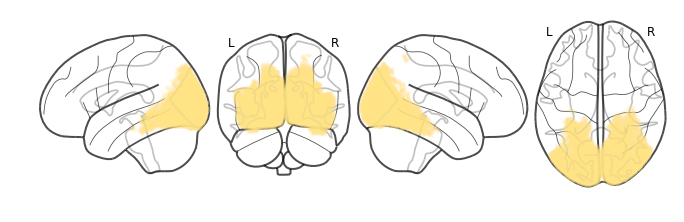

In [57]:
coords = network_coordinates_DK['Visual'][1::10]
coords_len = len(network_coordinates_DK['Visual'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[0]]*coords_len, 
                         display_mode='lyrz')

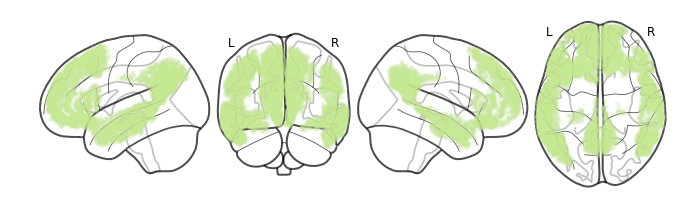

In [58]:
coords = network_coordinates_DK['Default'][1::10]
coords_len = len(network_coordinates_DK['Default'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[1]]*coords_len, 
                         display_mode='lyrz')

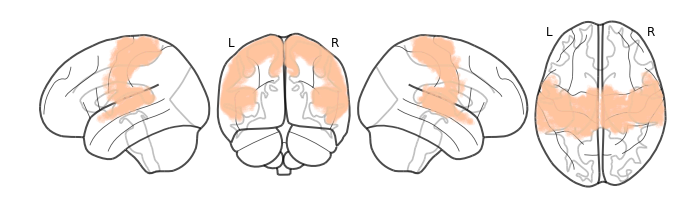

In [59]:
coords = network_coordinates_DK['Somatomotor'][1::10]
coords_len = len(network_coordinates_DK['Somatomotor'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[2]]*coords_len, 
                         display_mode='lyrz')

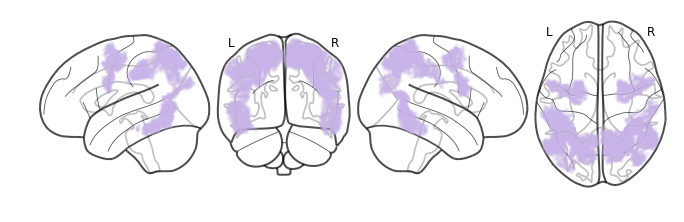

In [60]:
coords = network_coordinates_DK['Dorsal_Attention'][1::10]
coords_len = len(network_coordinates_DK['Dorsal_Attention'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[3]]*coords_len, 
                         display_mode='lyrz')

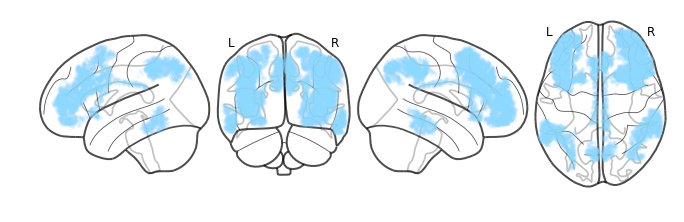

In [62]:
coords = network_coordinates_DK['Frontoparietal'][1::10]
coords_len = len(network_coordinates_DK['Frontoparietal'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[4]]*coords_len, 
                         display_mode='lyrz')

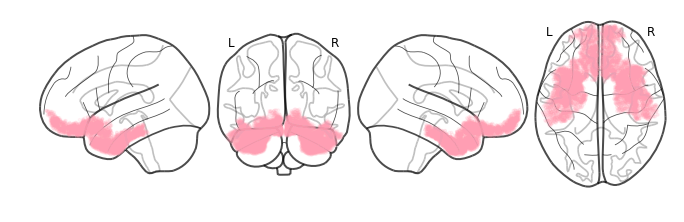

In [63]:
coords = network_coordinates_DK['Limbic'][1::10]
coords_len = len(network_coordinates_DK['Limbic'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[5]]*coords_len, 
                         display_mode='lyrz')

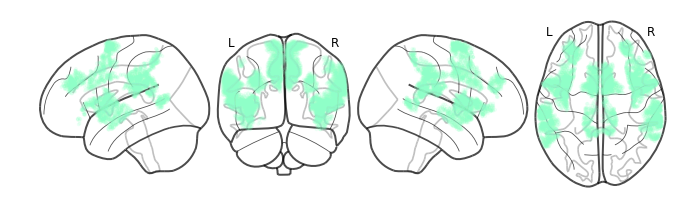

In [64]:
coords = network_coordinates_DK['Ventral_Attention'][1::10]
coords_len = len(network_coordinates_DK['Ventral_Attention'][1::10])
plotting.plot_connectome(np.array([[0]*coords_len]*coords_len),  
                         coords,
                         node_size = 10, 
                         node_color = [colors[6]]*coords_len, 
                         display_mode='lyrz')

In [46]:
network_coordinates_DK.keys()

dict_keys(['Default', 'Dorsal_Attention', 'Frontoparietal', 'Limbic', 'None', 'Somatomotor', 'Ventral_Attention', 'Visual'])